# Lab Assignment One: Exploring Table Data
Arely Alcantara, Emily Fashenpour

## 1. Business Understanding

New iOS applications are constantly being developed and, obviously, their creators want the applications to be successful and recieve good ratings. The table data we found contains the names of applications, their ratings, the genre, the version, and other relevant information to describe an app. This data could be relevant to other iOS app developers who are developing apps that are similar in genre, content rating, etc. and see what other apps did well or what they did poorly based on the rating that they recieved.

The Mobile App Store data we found was collected in July 2017 and it features more than 7,000 different apps with 18 features (excluding duplicate ID and name fields). This dataset can be accessed and downloaded from kaggle.com. The purpose of collecting this data was to see how similar apps stand out or do relative to others based on their ratings. This data was collected by grabbing the information from the Apples's App Store API.

In analyzing this dataset, we hope to see what can make an app recieve good ratings. This information could be extremely valuable to companies trying to rebrand their apps or looking at a future release. It could also show startups common mistakes in terms of low rated apps to know what not to do, and see what they can do to recieve high ratings.

Dataset URL: https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps#AppleStore.csv

Question we're trying to address: 
    - What makes an app get higher ratings in the App Store? 
    - How do apps in different markets compare?


## 2. Data Understanding

Our dataset consists of 2 files - where one contains the general app info, and the other contains the actual app descriptions. Both of these files share id,track_name, and size_bytes - so we decided to merge this data and have one central data source.

In addition, we renamed some columns that we felt were not descriptive enough as to what they are describing - for instance, the first column contains the index of each entry, so we renamed it from 'Unnamed: 0' to 'index'. 'ipadSc_urls.num' doesn't tell us much so we renamed it to 'screenshots' as this column lists the number of screenshots displayed in the app store page for that app.

In [1]:
import pandas as pd
import numpy as np

#read data from csv using pandas
appStore = pd.read_csv('data/AppleStore.csv')
description = pd.read_csv('data/appleStore_description.csv')

#merge 2 datasets since there is 2 files for general information and the description
outer_merge = pd.merge(appStore, description, on=['id', 'track_name', 'size_bytes'], how="outer", indicator=False)

# replace the column name of 'track_name' to 'name', 'prime_genre' to 'genre', remove the .num on some column names
outer_merge = outer_merge.rename(columns = {'track_name': 'app_name', 'prime_genre': 'genre', 'sup_devices.num': 'sup_devices', 'ipadSc_urls.num':'screenshots', 'lang.num':'sup_lang', 'Unnamed: 0': 'index', 'app_desc': 'app_desc_count'})

outer_merge.head()


,index,id,app_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,genre,sup_devices,screenshots,sup_lang,vpp_lic,app_desc_count
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...


In [2]:
#show current column info with data type
print(outer_merge.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 18 columns):
index               7197 non-null int64
id                  7197 non-null int64
app_name            7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
genre               7197 non-null object
sup_devices         7197 non-null int64
screenshots         7197 non-null int64
sup_lang            7197 non-null int64
vpp_lic             7197 non-null int64
app_desc_count      7197 non-null object
dtypes: float64(3), int64(9), object(6)
memory usage: 1.0+ MB
None


##### Removing columns that are not needed
Some columns are not crucial or necessary for us to examine, so we have decided to remove them from our analysis. Those include the index column - which just lists the index of each entry, the id column - since it is a unique identifier and doesn't add/remove value to our findings, currency column - there is only one value and it is 'USD', app_name column - the name of the app is not relevant to us, and vpp_lic column tells us Vpp Device Based Licensing Enabled and either holds a 0 or 1 and every entry contained a 1. We also changed the data type of some columns, including size_bytes, rating_count, and version. We did this so that we could more easily visualize the data.

In [3]:
#functions used to reassign values in column of the outer_merge data frame

#takes an integer as a param and returns a string of the range where the value 
#falls betweem. example: 10000 becomes '1000-100,000'
def map_rating_count(x):
    if x > -1 and x <= 1000:
        return '0-1000'
    if x > 1000 and x <= 100000:
        return '1000-100,000'
    if x > 100000 and x <= 200000:
        return '100,000-200,000'
    if x > 200000 and x <= 500000:
        return '200,000-500,000'
    if x > 500000 and x <= 1000000:
        return '500,000-1,000,000'
    if x > 1000000 and x <= 3000000:
        return '1,000,000-3,000,000'

#takes an integer as a param and returns a string of the range where the value 
#falls betweem. example: 4,000,000 Bytes becomes '400 KB-6MB'
def map_bytes(x):
    if x > 400000 and x <= 60000000:
        return '400 KB-60 MB'
    if x > 60000000 and x <= 120000000:
        return '60 MB-120 MB'
    if x > 120000000 and x <= 300000000:
        return '120 MB-300 MB'
    if x > 300000000 and x <= 600000000:
        return '300 MB-600 MB'
    if x > 600000000 and x <= 1000000000:
        return '600 MB-1 GB'
    if x > 1000000000 and x <= 4500000000:
        return '1 GB-4.5 GB'
    
#take a string version as a param and converts to the integer before 
#the first period. example: 'v1.4.5' becomes 1
def map_version(x):
    i = 0
    ver = ''
    while i < len(x) and x[i] != '.':
        #checks to see is an index of x is a number using ascii value
        if ord(x[i]) > 47 and ord(x[i]) < 58:
            ver += x[i]
        i+=1
    return int(ver)

In [4]:
import numpy as np

#drop unneeded columns
outer_merge.drop(['index', 'id', 'currency', 'app_name', 'vpp_lic'], axis=1, inplace=True)

#change ordinal features to ints - ratings have .5 values so multiple by 2 to make them managable
#values for ratings and ratings versions will be between 0 and 10
outer_merge['user_rating'] = outer_merge['user_rating'].apply(lambda x: x*2).astype(np.int64)
outer_merge['user_rating_ver'] = outer_merge['user_rating_ver'].apply(lambda x: x*2).astype(np.int64)

#change content rating to values from 1 to 4
outer_merge['cont_rating'] = outer_merge['cont_rating'].map({'4+': 1, '9+': 2, '12+': 3, '17+': 4})

#change rating counts to a string using the map_rating_count function
outer_merge['rating_count_tot'] = outer_merge['rating_count_tot'].apply(map_rating_count)
outer_merge['rating_count_ver'] = outer_merge['rating_count_ver'].apply(map_rating_count)

#change size_bytes to a string using the map_bytes function
outer_merge['size_bytes'] = outer_merge['size_bytes'].apply(map_bytes)

#change version to an integer using the map_version function
outer_merge['ver'] = outer_merge['ver'].apply(map_version)

#we dont necessarily need description at this point but we are basing analysis on length of description
outer_merge['app_desc_count'] = outer_merge['app_desc_count'].apply(lambda x: len(x))

print(outer_merge.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 13 columns):
size_bytes          7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null object
rating_count_ver    7197 non-null object
user_rating         7197 non-null int64
user_rating_ver     7197 non-null int64
ver                 7197 non-null int64
cont_rating         7197 non-null int64
genre               7197 non-null object
sup_devices         7197 non-null int64
screenshots         7197 non-null int64
sup_lang            7197 non-null int64
app_desc_count      7197 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 787.2+ KB
None


### 2.2 Data Quality

We have 7197 entries and every field that we need is filled - therefore we have no missing data. This makes sense because all apps have to have an app name, ratings, a version number, and overall just general information about their app.

However, if hypothetically we had missing data, we would probably go down the road of elimination since most features are crucial and unique to each type of app. We could not impute or infer missing data because it would skew our analysis and not be an accurate representation of where the app stands in comparison to other apps. Ratings, screenshots, supported languages - any of these fields could vary and we would rather remove the missing data rows to avoid misinterpreting our results.


In [5]:
#describe data
outer_merge.describe()

,price,user_rating,user_rating_ver,ver,cont_rating,sup_devices,screenshots,sup_lang,app_desc_count
count,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.726218,7.053911,6.507156,16.582048,1.717382,37.361817,3.707100,5.434903,1553.714186
std,5.833006,3.035895,3.618726,342.731852,1.020983,3.737715,1.986005,7.919593,1010.574457
min,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,17.000000
25%,0.000000,7.000000,5.000000,1.000000,1.000000,37.000000,3.000000,1.000000,737.000000
50%,0.000000,8.000000,8.000000,1.000000,1.000000,37.000000,5.000000,1.000000,1366.000000
75%,1.990000,9.000000,9.000000,3.000000,2.000000,38.000000,5.000000,8.000000,2190.000000
max,299.990000,10.000000,10.000000,9999.000000,4.000000,47.000000,5.000000,75.000000,4000.000000


In [6]:
#find duplicate instances if any
idx = outer_merge.duplicated()
len(outer_merge[idx])

13

We have 0 duplicates! Every row is unique, so no need to drop/remove any rows right now.

If in another world there were duplicates, we would choose to remove them as having duplicates would most likely cloud our findings and not add any value to our analysis. We prefer to deal with unique rows so that we can see different apps overall and how they stand in relation to other markets, or just see how successful they are.

In [7]:
# create a dataframe to describe the data and its attributes

df_data_desc = pd.DataFrame({
    'Attribute':['size_bytes','price','rating_count_tot','rating_count_ver','user_rating','user_rating_ver',
                 'ver','cont_rating','genre','sup_devices','screenshots','sup_lang','app_desc_count'],
    'Description':['Size of the app in Bytes','App Price','Total number of user ratings','Number of user ratings for the current verion',
             'Average user rating for all versions','Average user rating for current version',
             'Latest version number','Content Rating','App Genre','Number of supporting Devices','Number of screenshots shown for display in app description',
             'Number of supported languages','Number of words in the app description'],
    'Discrete/Continuous':['Continuous','Continuous','Continuous','Continuous','Discrete','Discrete','Discrete',
                           'Discrete','Discrete','Continuous','Continuous','Continuous','Continuous'],
    'Scale':['Ratio','Ratio','Ratio','Ratio','Ordinal','Ordinal','Ordinal','Ordinal','Nominal','Ratio','Ratio',
             'Ratio','Ratio'],
    'Range':['400 KB-60 MB; 60 MB-120 MB; 120 MB-300 MB; 300 MB-600 MB; 600 MB-1 GB; 1 GB-4.5 GB',
             '0-299.99','0-1000; 1000-100,000; 100,000-200,000; 200,000-500,000; 500,000-1,000,000; 1,000,000-3,000,000',
             '0-1000; 1000-100,000; 100,000-200,000; 200,000-500,000; 500,000-1,000,000; 1,000,000-3,000,000',
             '0: Rating 0, 1: Rating 0.5, 2: Rating 1, 3: Rating 1.5, 4: Rating 2, 5: Rating 2.5, 6: Rating 3, 7: Rating 3.5, 8: Rating 4, 9: Rating 4.5, 10: Rating 5',
             '0: Rating 0, 1: Rating 0.5, 2: Rating 1, 3: Rating 1.5, 4: Rating 2, 5: Rating 2.5, 6: Rating 3, 7: Rating 3.5, 8: Rating 4, 9: Rating 4.5, 10: Rating 5',
             '0-9999','1: Toddlers 4+; 2: Children 9+; 3: Teens 12+; 4: Adults 17+',
             '23 Genres: \'Games\', \'Entertainment\', \'Social Networking\', \'Music\'...','9-47','0-5','0-75','17-4000']
})

# print the description dataframe
df_data_desc

,Attribute,Description,Discrete/Continuous,Scale,Range
0,size_bytes,Size of the app in Bytes,Continuous,Ratio,400 KB-60 MB; 60 MB-120 MB; 120 MB-300 MB; 300...
1,price,App Price,Continuous,Ratio,0-299.99
2,rating_count_tot,Total number of user ratings,Continuous,Ratio,"0-1000; 1000-100,000; 100,000-200,000; 200,000..."
3,rating_count_ver,Number of user ratings for the current verion,Continuous,Ratio,"0-1000; 1000-100,000; 100,000-200,000; 200,000..."
4,user_rating,Average user rating for all versions,Discrete,Ordinal,"0: Rating 0, 1: Rating 0.5, 2: Rating 1, 3: Ra..."
5,user_rating_ver,Average user rating for current version,Discrete,Ordinal,"0: Rating 0, 1: Rating 0.5, 2: Rating 1, 3: Ra..."
6,ver,Latest version number,Discrete,Ordinal,0-9999
7,cont_rating,Content Rating,Discrete,Ordinal,1: Toddlers 4+; 2: Children 9+; 3: Teens 12+; ...
8,genre,App Genre,Discrete,Nominal,"23 Genres: 'Games', 'Entertainment', 'Social N..."
9,sup_devices,Number of supporting Devices,Continuous,Ratio,9-47


## 3. Data Visualization

### 3.1 Data Exploration

In [8]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

#### 3.1.1 Average rating based on genre

In [9]:
#starting off by grouping by genre and average rating per genre
df_grouped_genre = outer_merge.groupby(by='genre')
for val, grp in df_grouped_genre:
    print('The average rating in ' + str(val) + ' is ' + str(float(round((grp.user_rating.sum() / len(grp))/2, 3))))

The average rating in Book is 2.478
The average rating in Business is 3.746
The average rating in Catalogs is 2.1
The average rating in Education is 3.376
The average rating in Entertainment is 3.247
The average rating in Finance is 2.433
The average rating in Food & Drink is 3.183
The average rating in Games is 3.685
The average rating in Health & Fitness is 3.7
The average rating in Lifestyle is 2.806
The average rating in Medical is 3.37
The average rating in Music is 3.978
The average rating in Navigation is 2.685
The average rating in News is 2.98
The average rating in Photo & Video is 3.801
The average rating in Productivity is 4.006
The average rating in Reference is 3.453
The average rating in Shopping is 3.541
The average rating in Social Networking is 2.985
The average rating in Sports is 2.982
The average rating in Travel is 3.377
The average rating in Utilities is 3.278
The average rating in Weather is 3.597


Text(0, 0.5, 'Genre')

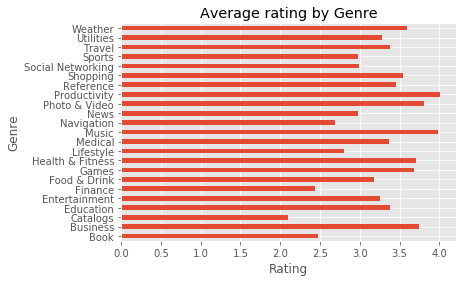

In [10]:
#plot rating vs genre
plt.style.use('ggplot')
plt.title('Average rating by Genre')
average_rating = df_grouped_genre.user_rating.sum() / df_grouped_genre.user_rating.count() / 2
ax = average_rating.plot(kind="barh")
plt.xlabel('Rating')
plt.ylabel('Genre')

'Average rating by Genre' shows the genre versus the rating in that genre. We can see that Productivity apps have the greatest ratings with roughly 4.0/5.0; and the lowest rating is 2.1/5.0 with Catalogs app. The second most rated genre is Music with almost 4.0/5.0 - from this we can see that overall people might prefer Productivity and Music apps - meaning that they like to stay organized and listen to music. While we can see that people going into the Catalogs business, it might not be a bright move so proceed with caution.

#### 3.1.2 Average Rating based on Description Words

In [11]:
# Group the dataframe outer_merge by user_rating
df_grouped_rating = outer_merge.groupby(by='user_rating')
for rat, grp in df_grouped_rating:
    print('There were',len(grp),'apps with a rating of',str(rat/2)+'.')
print('\nAverage description words per rating.\n',df_grouped_rating.app_desc_count.sum()/df_grouped_rating.app_desc_count.count())

There were 929 apps with a rating of 0.0.
There were 44 apps with a rating of 1.0.
There were 56 apps with a rating of 1.5.
There were 106 apps with a rating of 2.0.
There were 196 apps with a rating of 2.5.
There were 383 apps with a rating of 3.0.
There were 702 apps with a rating of 3.5.
There were 1626 apps with a rating of 4.0.
There were 2663 apps with a rating of 4.5.
There were 492 apps with a rating of 5.0.

Average description words per rating.
 user_rating
0      885.167922
2      958.250000
3     1058.857143
4     1227.056604
5     1414.224490
6     1416.000000
7     1553.304843
8     1737.679582
9     1753.145700
10    1471.957317
Name: app_desc_count, dtype: float64


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1.5'),
 Text(0, 0, '2'),
 Text(0, 0, '2.5'),
 Text(0, 0, '3'),
 Text(0, 0, '3.5'),
 Text(0, 0, '4'),
 Text(0, 0, '4.5'),
 Text(0, 0, '5')]

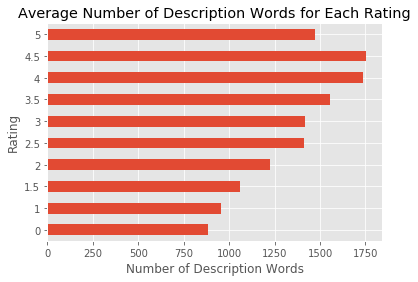

In [12]:
plt.style.use('ggplot')

#find the average number of description words for each rating
avg_desc_words = df_grouped_rating.app_desc_count.sum()/df_grouped_rating.app_desc_count.count()
avg_plt = avg_desc_words.plot(kind = 'barh')
plt.title('Average Number of Description Words for Each Rating')
plt.xlabel('Number of Description Words')
plt.ylabel('Rating')
avg_plt.set_yticklabels(['0','1','1.5','2','2.5','3','3.5','4','4.5','5'])

'Average Number of Description Words for Each Rating' shows the average number of description words for each rating. For example, apps that have a rating of 3 have an average of of 1417 words in their description on the app store. According to the graph above, the apps with a rating of 4 and 4.5 have, on average, the longest descriptions and apps with low ratings of 0 and 1 have short descriprions. From this graph, app developers could infer that writing a longer app description is better. Apps that have longer descriptions have higher ratings and this could be  due to consumers knowing what they are getting when they download this application, since the desciption decribes what the app has to offer.

#### 3.1.3 User Ratings based on Screenshots

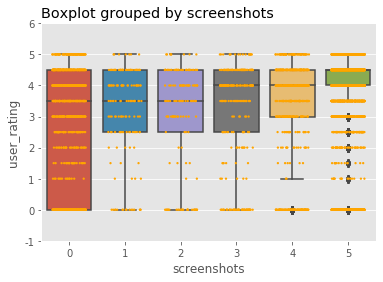

In [13]:
import seaborn as sns

ax = sns.boxplot(x='screenshots', y='user_rating', data=outer_merge)
ax = sns.stripplot(x='screenshots', y='user_rating', data=outer_merge, color="orange", jitter=0.3, size=2.3)
locs, labels = plt.yticks()
labels = [int(item/2) for item in locs]
plt.yticks(locs, labels)  
plt.title("Boxplot grouped by screenshots", loc="left")
plt.show()

'Boxplot grouped by screenshots’ depicts the number of screenshots shown in the app store when you're about to download an app, versus the overall user rating for the app. For apps with zero screenshots, the distribution of ratings is pretty spread out with 75% of those ratings being between 0 and 4.5 stars. For apps with 1, 2, or 3 screenshots, 75% of the ratings lay between 2.5 and 4.5 starts which is relatively better than having 0 screenshots. For apps with 4 screenshots, 75% of the ratings lay between 3 and 4.5 - again an improvement to the previous group of 1/2/3 screenshots. And finally, apps with 5 screenshots have 75% of their ratings between 4 and 4.5 - and this is the best rating group there is. We can infer that the more screenshots an app displays on their page, the more likely a person is to download the app and positively rate it. The yellow dots all over show where the data is concentrated - and we can see that the ratings overall range from 0 to 5 with 0.5 increments - there's no clear pattern to this since there are a lot of areas that are dense. Biggest takeaway is that more screenshot = happier users with good feedback.

#### 3.1.4 App rating and number of supported languages

[Text(0, 0, '-1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

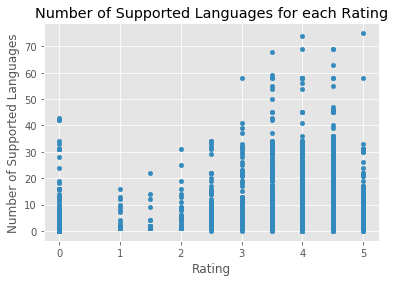

In [14]:
#create a scatterplot of rating and the number of supported
#languages that an app of that rating has

ax = outer_merge.plot.scatter(x='user_rating',y='sup_lang')
plt.title('Number of Supported Languages for each Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Supported Languages')
ax.set_xticklabels(['-1','0','1','2','3','4','5'])

The scatter plot 'Number of Supported Languages for each Rating' shows each app's rating and number of supported languages. You can see in the graph that there are no apps that are rated 0.5. Each app that has a rating of 1 has a dot in the x-axis rating column of the number of supported languages. Apps that have a higher rating have a larger range of supported langauges than apps that have a lower rating. For example, apps that have a rating of 4.5 have a range of languages from 1 to roughly 70 while apps with a rating of 1 have a range from 1 to roughly 17. This would demonstrate to app developers and owners that the apps with more languages supported have a high rating. This makes sense because the app would be more appealing to a large audience.

#### 3.1.5 Price based on Size of an App

[None]

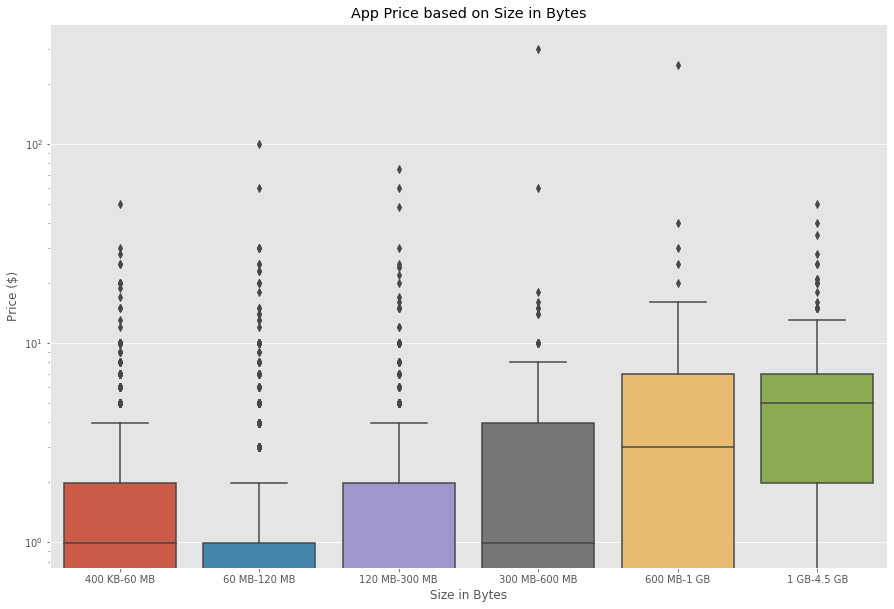

In [15]:
#create a box plot to show price and size in bytes
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x="size_bytes", y="price", data=outer_merge, order = ['400 KB-60 MB','60 MB-120 MB','120 MB-300 MB','300 MB-600 MB','600 MB-1 GB','1 GB-4.5 GB'])
plt.title('App Price based on Size in Bytes')
plt.xlabel('Size in Bytes')
plt.ylabel('Price ($)')
ax.set(yscale='log')

The boxplot 'App Price based on Size in Bytes' shows the size of an app in Bytes versus the price of the app. From the plot you can see that apps that are larger in Byte size, have a higher price. This makes sense because apps that have a lot more features, etc. to them took more to develop and they need a lot of return on them. This could demonstate to app developers that if they have a larger sized app, they could charge a higher price. However, they could see the median and different percentiles and charge a lower but still competitive price than other apps of similar sizes.

#### 3.1.6 Comparison of App's Overall Rating and Current Version Rating

[Text(0, 0, '-2'),
 Text(0, 0, '-1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

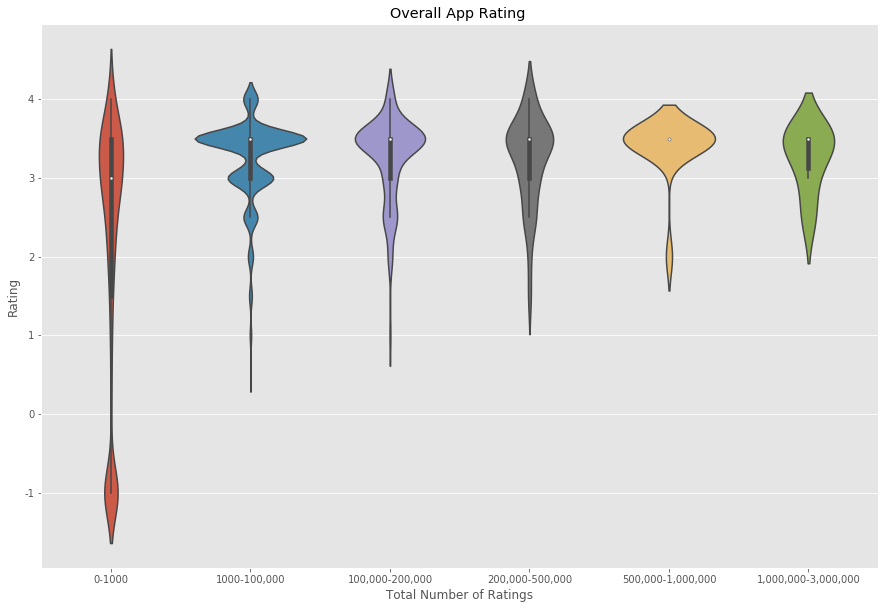

In [16]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(15, 10))
ax = sns.violinplot(x = "rating_count_tot", y="user_rating", data = outer_merge, order=['0-1000', '1000-100,000','100,000-200,000','200,000-500,000','500,000-1,000,000','1,000,000-3,000,000'])
plt.title('Overall App Rating ')
plt.xlabel('Total Number of Ratings')
plt.ylabel('Rating')
ax.set_yticklabels(['-2','-1','0','1','2','3','4','5','6'])

[Text(0, 0, '-2'),
 Text(0, 0, '-1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

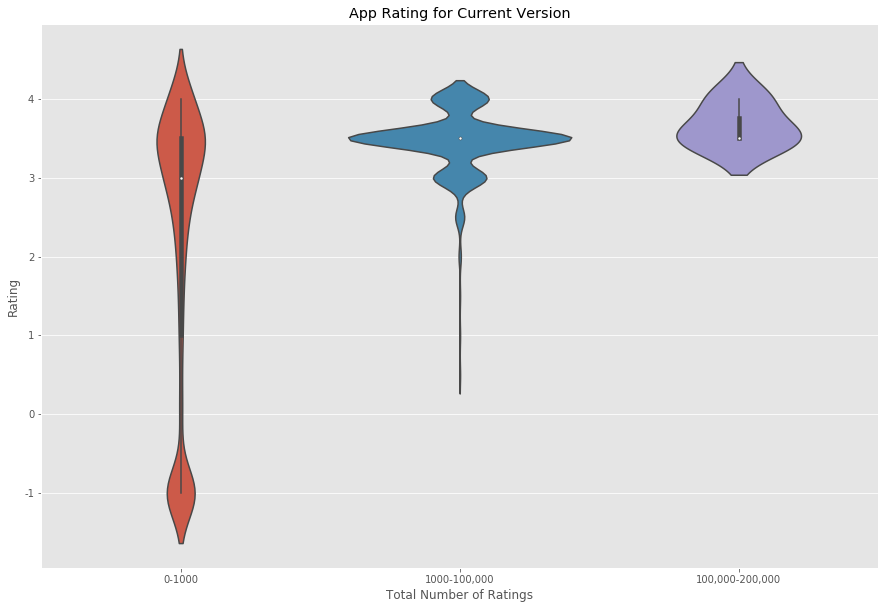

In [17]:
plt.subplots(figsize=(15, 10))
ax = sns.violinplot(x = "rating_count_ver", y="user_rating_ver", data = outer_merge)
plt.title('App Rating for Current Version')
plt.xlabel('Total Number of Ratings')
plt.ylabel('Rating')
ax.set_yticklabels(['-2','-1','0','1','2','3','4','5','6'])

In the two violin plots above, 'Overall App Rating' and 'App Rating for Current Version', the relationship between the current version of an app's rating and it's overall rating can be seen. From the plots, you can see that apps that have a higher count of user ratings have higher ratings, both for overall rating and current version ratings. This also shows that apps are delivering consistent quality that keeps their users happy. This makes sense because apps that have higher ratings become more popular because they reach top charts and in turn receive more ratings.

#### 3.1.7 Content Rating based on genre

cont_rating           1    2    3    4
genre                                 
Book                 63   11   20   18
Business             54    0    1    2
Catalogs              6    1    1    2
Education           432    6    8    7
Entertainment       285   44  108   98
Finance              75    0    5   24
Food & Drink         44    0   11    8
Games              2079  865  741  177
Health & Fitness    141    5   19   15
Lifestyle            88    5   12   39
Medical               5    0   14    4
Music               102    4   28    4
Navigation           40    0    4    2
News                 18    5   29   23
Photo & Video       285   14   35   15
Productivity        158    4    2   14
Reference            44    2   12    6
Shopping             82    3   18   19
Social Networking    57    3   36   71
Sports               76    2   17   19
Travel               63    1    8    9
Utilities           170   12   22   44
Weather              66    0    4    2


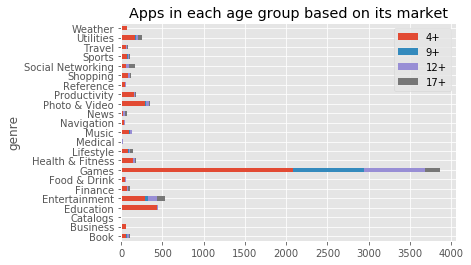

In [18]:
content = pd.crosstab([outer_merge['genre']], # categories to cross tabulate
                       outer_merge.cont_rating) # how to group
print(content)

ax = content.plot(kind='barh', stacked=True, title="Apps in each age group based on its market")
ax.legend(["4+", "9+", "12+", "17+"])

This horizontal bar chart shows the total count of apps in each market/genre and how many of those apps belong to each age group. There are 4 age groups which we renamed for easier handling - Toddlers are 4+ denoted by a value of 1, Children are 9+ denoted by 2, Teens are 12+ denoted by 3, and Adults are 17+ denoted by 4. Games is by far the category with the most apps with about 3,700 - 2,079 of which are apps for toddlers!! Overall, most markets seem to target 4+ content since the first color bar reaches at least 50% of their total market. The children apps and teen apps seem to vary by market but seem to have about 5-10% of each market. Adults apps overall take up a very small portion of each market with the exception of Utilities, Social Networking, Entertainment, and news where they appear to hold 20-30% of each market - which makes sense because adults want to stay informed with the latest news, they want to be organized, as well as have a social life and fun.

#### 3.1.8 Average Version for Each Rating

[None]

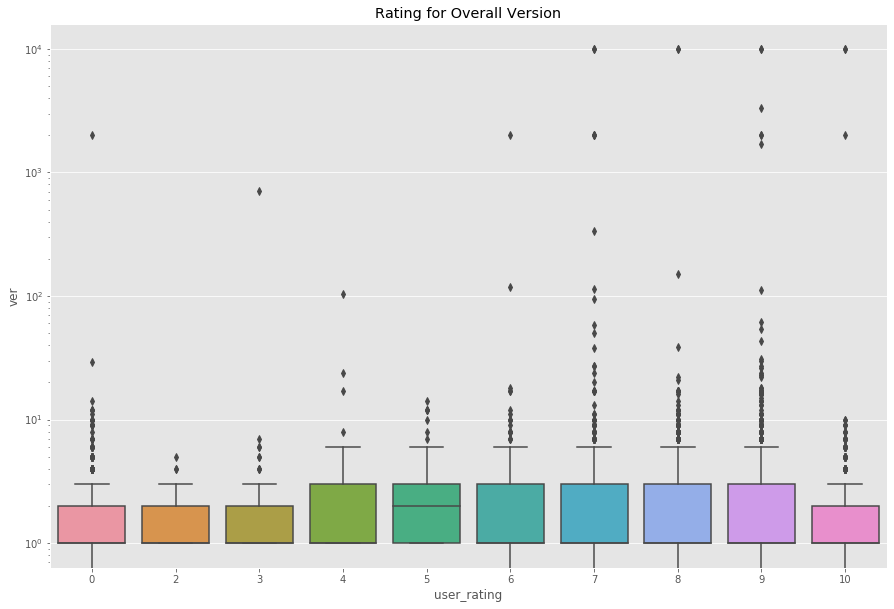

In [19]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x = "user_rating", y="ver", data = outer_merge)
plt.title('Rating for Overall Version')
ax.set(yscale='log')

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1.5'),
 Text(0, 0, '2'),
 Text(0, 0, '2.5'),
 Text(0, 0, '3'),
 Text(0, 0, '3.5'),
 Text(0, 0, '4'),
 Text(0, 0, '4.5'),
 Text(0, 0, '5')]

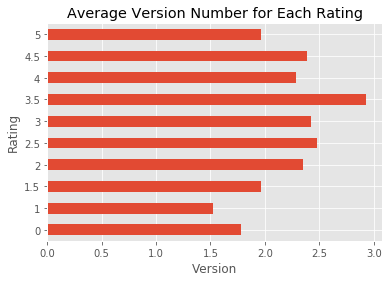

In [20]:
#noticed there were outliers, decided to remove them. Outliers because of the way that tag their version
#removed to get a more accurate average version for each rating bc it was skewed before

outlier_count = outer_merge[outer_merge['ver'] > 95]['ver'].count()

outer_merge = outer_merge[outer_merge['ver'] <= 95]
df_grouped_rating = outer_merge.groupby(by='user_rating')

avg_ver = df_grouped_rating.ver.sum()/df_grouped_rating.ver.count()
avg_plt = avg_ver.plot(kind = 'barh')
plt.title('Average Version Number for Each Rating')
plt.xlabel('Version')
plt.ylabel('Rating')
avg_plt.set_yticklabels(['0','1','1.5','2','2.5','3','3.5','4','4.5','5'])


In 'Average Version Number for Each Rating', you can see that all the ratings range from 1.5 or 3 versions, where the version of 3 has the most ratings at 3.5. All the apps have released around the same number of versions and this shows that having a lot of versions does not secure a higher rating. This also shows that there are other more important factors that tie into rating than just the version.

### 3.2 Data Relationship Exploration

#### 3.2.1 Correlation Matrix for screenshots, description word count, and user rating

                app_desc_count  screenshots  user_rating
app_desc_count        1.000000     0.193688     0.273421
screenshots           0.193688     1.000000     0.265786
user_rating           0.273421     0.265786     1.000000


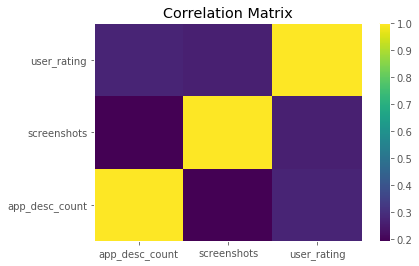

In [21]:
# plot the correlation matrix 
vars_to_use = ['app_desc_count', 'screenshots', 'user_rating'] 
plt.pcolor(outer_merge[vars_to_use].corr()) 
print(outer_merge[vars_to_use].corr())

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix, we can see that app description count and screenshots have a low ~but~ positive correlation of about 0.20. While user ratings and screenshots have a correlation value of 0.27 meaning that the number of screenshots can affect the user rating of an app. App description and user rating have a correlation of 0.27 so again the length of the app description can have an impact on user ratings. The correlation among screenshots/description count is positive and a little low, but this serves to show that everything that the user can see on the app store can affect how successful or how a user rates that given app - this supports the analysis from above (section 3.1.2).

#### 3.2.2 Correlation of supported devices, supported languages, and price

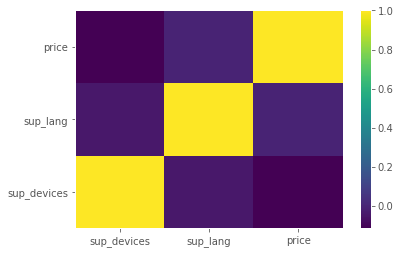

In [22]:
vars_to_use = ['sup_devices', 'sup_lang','price']
plt.pcolor(outer_merge[vars_to_use].corr())
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

Price and supported devices are positively correlated with a value of about 0.15 - which is low but this just means the number of supported devices slightly affects the price. Supported languages and price have a positive correlation of about 0.2 - still a low value but the number of languages might also affect the price since it might take a little more effort to have the app available in x amount of languages. Supported devices and supported languages are also kind of related with about .15 correlation value so if an app owner is really dedicated to their audience - they’re willing to add more devices and languages so that anyone anywhere can use their app with ease.

#### 3.2.3 Correlation Matrix (overall)

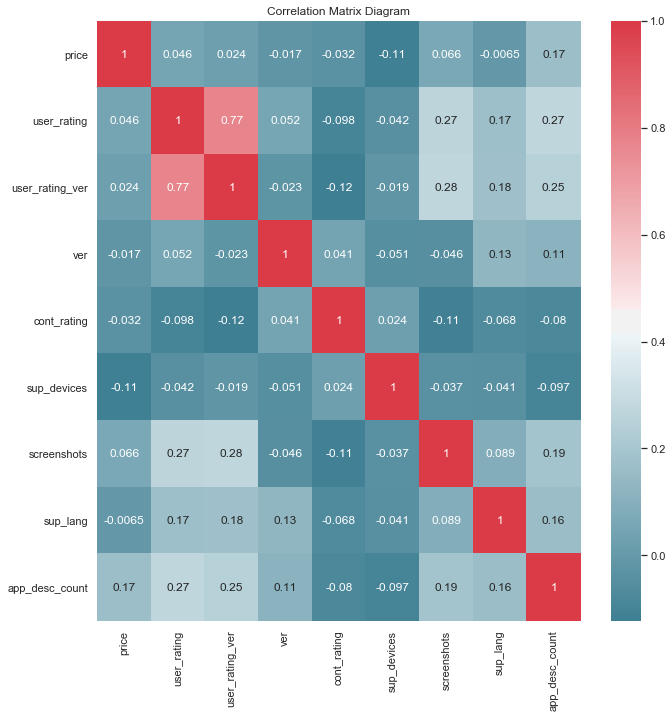

In [23]:
# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(outer_merge.corr(), cmap=cmap, annot=True)

f.tight_layout()
plt.title('Correlation Matrix Diagram')
plt.show()


Looking at the overall correlation matrix, we can see that user rating version and user rating have the highest, positive correlation with a value of 0.77 - meaning that the version of an app can greatly impact its ratings. Other than that, most other correlation are relatively low or even negative - so to address this, we decided to analyze a market specifically to find out more about it (see section 4 below).

## 4. Additional Analysis

According to Statista, the most popular market for app store apps is Games with 24.63% of the app store market. So, we decided to look into this market specifically to see what is required to be successful and to give advice to those who would be interested in entering this specific market.

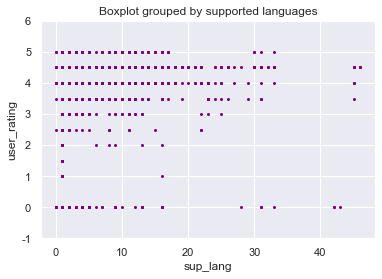

In [24]:
#extract the data where the market is relative to games - which is what we're investigating
content = outer_merge.loc[outer_merge['genre'] == 'Games']
#content_rating
content.plot.scatter(x='sup_lang', y='user_rating', s=4,color="purple")
locs, labels = plt.yticks()
labels = [int(item/2) for item in locs]
plt.yticks(locs, labels)  
plt.title("Boxplot grouped by supported languages")
plt.show()

Overall, no matter the rating, apps tend to have 0 to 10 supported languages - this shows that the app makers keep in mind their customers and want their app readily available to others so that they can use it in any country or in any language. There are few outliers - so apps that support 40+ languages - however, some have a rating of 0 or from 3.5 to 4.5 - so having that many languages does not ensure that you would have a 4 or 5 star app. It's important to know your audience and know what languages to have in order to satisfy your users if you're wanting to get into the games market of the app store

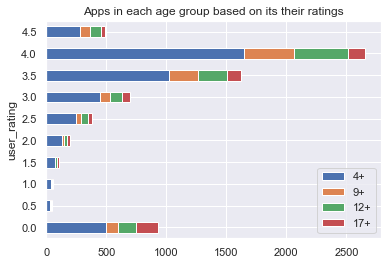

In [25]:
content_rating = pd.crosstab([outer_merge['user_rating']], # categories to cross tabulate
                       outer_merge.cont_rating) # how to group

ax = content_rating.plot(kind='barh', stacked=True, title="Apps in each age group based on its their ratings")
ax.legend(["4+", "9+", "12+", "17+"])
locs, labels = plt.yticks()
labels = [item/2 for item in locs]
plt.yticks(locs, labels) 
plt.show()

Most apps within the games market seem to have a 3.5 rating and above. With the rating of 3 containing about 2,700 of the entries in our dataset. The apps for toddlers seem to have about half the ratings in each rating group. While the children and teens apps each hold about 15-20% of each rating group, and adult gaming apps - hold 5-10% which is not a big portion. So, if you're a gaming app and you want a good rating, then half of your audience is most likely people who use games for toddlers - so try to aim to appease them if that's the market you're trying to go into.

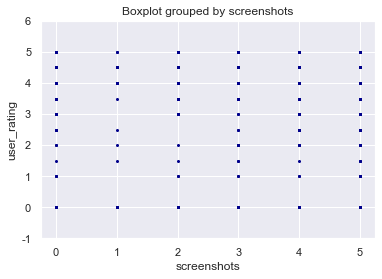

In [26]:
content.plot.scatter(x='screenshots', y='user_rating', s=4,color="darkBlue")
locs, labels = plt.yticks()
labels = [int(item/2) for item in locs]
plt.yticks(locs, labels)  
plt.title("Boxplot grouped by screenshots")
plt.show()

This scatterplot shows that there's a consistent pattern for each group of screenshot amount - meaning that it doesn't matter how many screenshots you post since it might not make a difference to your gamers looking for apps to download from the App Store.



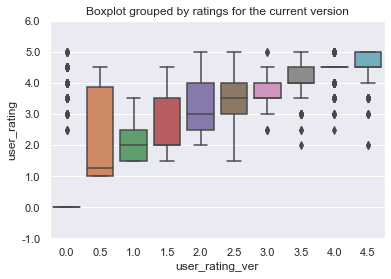

In [27]:
sns.boxplot(x='user_rating_ver', y='user_rating', data=content)
locs, labels = plt.yticks()
locs2, labels2 = plt.xticks()
labels = [item/2 for item in locs]
labels2 = [item/2 for item in locs2]
plt.yticks(locs, labels)  
plt.xticks(locs2, labels2) 
plt.title("Boxplot grouped by ratings for the current version")
plt.show()

This diagram shows that there is a great difference between the current version of the app and the overall rating for the app. Higher rated apps currently tend to be consistent with their overall rating. While apps with a very low (current) rating have a varying overall rating. For the gaming apps out there, we would say to strive to release their best version and keep users engaged so that their current reviews can be similar to their overall rating and their name is known in the world.

## Closing Thoughts


The definition for success will differ based on who you ask - some might say 3 or 3.5 stars make a good app - while other might say that 4.5 or 5 stars are needed for an app to exceptional. We will not push onto you what a successful app is and will give you the findings up straight and let you decide. What we found is that all markets seem to be rated by the "toddler" users aged 4+, so this audience is one to consider even if it is not your target audience. We also found that the number of screenshots displayed in the app store affect how a user might possibly rate the app. Apps with a longer description tended to have a rating of at least 4 or more stars. Productivity and Music apps had the highest ratings overall meaning that people really prefer those apps to stay organized and listen to some good tunes.

Our research was a bit too broad, so we decided to narrow down on a specific market/genre in order to understand its patterns (if any) were available. The games market seems to be the biggest market and about half of our dataset is made up of game app entries. We found that the number of supported languages has no impact on user ratings, but most apps tend to have about 10 supported languages. We also found that the number of screenshots shown in the app store has no effect on the user ratings.

Our purpose overall was to try to predict how an app would do on the app store based on their market and how it stands relative to existing apps in our dataset. We can say that the age group of ages 4+ have a great impact on reviews/ratings, since they make up half of the ratings in almost every market. The number of screenshots, and the description word count are all relevant and play a role in how a user might rate the app. So, if you're trying to release a new app, be aware of that.

## References


Kaggle. "Mobile App Statistics (Apple iOS app store)". https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps#AppleStore.csv (Accessed 09/03/2019).

Statista. "Most popular Apple App Store categories in May 2019, by share of available apps". https://www.statista.com/statistics/270291/popular-categories-in-the-app-store/ (Accessed 09/09/2019).